<a href="https://colab.research.google.com/github/sadhvisshetty/Digits_recognization/blob/main/handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HAND WRITTEN DIGIT PREDICTION

OBJECTIVE:
The objective of the "Handwritten Digit Prediction" project is to develop a machine learning model that accurately predicts and classifies handwritten digits (0-9) from grayscale images. It automates digit recognition for applications like document digitization and postal code processing. The project involves image preprocessing, neural network modeling, and performance evaluation using metrics like accuracy and confusion matrix. By leveraging machine learning techniques, it aims to achieve high reliability in predictions. It also provides practical insights into working with image datasets and implementing classification systems. Overall, the project combines theory and application to solve a real-world problem effectively.








DATA SOURCE:
The data source for the "Handwritten Digit Prediction" project is the MNIST dataset. It contains 70,000 grayscale images of handwritten digits (0-9), where 60,000 are used for training, and 10,000 are for testing. Each image is 28x28 pixels, and the dataset includes labels for the digits. The MNIST dataset is freely available and can be easily loaded using machine learning libraries like TensorFlow or PyTorch. It is widely used for digit recognition projects because it is well-prepared and easy to work with.

In [ ]:
#Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
#Import data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#Data Preprocessing
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
#Build the Model
model = Sequential([
    Flatten(input_shape=(28, 28)),          # Flatten the input images (28x28) into a 1D array
    Dense(128, activation='relu'),         # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),          # Hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax')        # Output layer with 10 neurons (one for each digit) and softmax activation
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8603 - loss: 0.4772 - val_accuracy: 0.9567 - val_loss: 0.1487
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9641 - loss: 0.1220 - val_accuracy: 0.9647 - val_loss: 0.1194
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9754 - loss: 0.0812 - val_accuracy: 0.9618 - val_loss: 0.1289
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9816 - loss: 0.0587 - val_accuracy: 0.9706 - val_loss: 0.1007
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9853 - loss: 0.0446 - val_accuracy: 0.9733 - val_loss: 0.0950
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9890 - loss: 0.0336 - val_accuracy: 0.9724 - val_loss: 0.0999
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9917 - loss: 0.0269 - val_accuracy: 0.9715 - val_loss: 0.1150
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9923 - loss: 0.0227

In [ ]:
#Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9742 - loss: 0.1207
Test Accuracy: 97.63%


In [ ]:
#Classification Analysis
# Predict on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to label indices
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

Confusion Matrix:
[[ 973    0    0    1    0    1    2    0    2    1]
 [   0 1126    4    0    0    0    4    0    1    0]
 [   3    2 1013    3    0    0    1    6    4    0]
 [   0    0    1  998    0    4    0    2    0    5]
 [   3    2   14    1  928    2    8    7    3   14]
 [   3    0    0   10    0  868    6    0    3    2]
 [   2    1    2    1    1    5  945    0    1    0]
 [   2    6   10    4    0    0    0  991    3   12]
 [   2    0    7   11    1    3    2    4  940    4]
 [   1    4    2    5    5    8    0    1    2  981]]


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.95      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



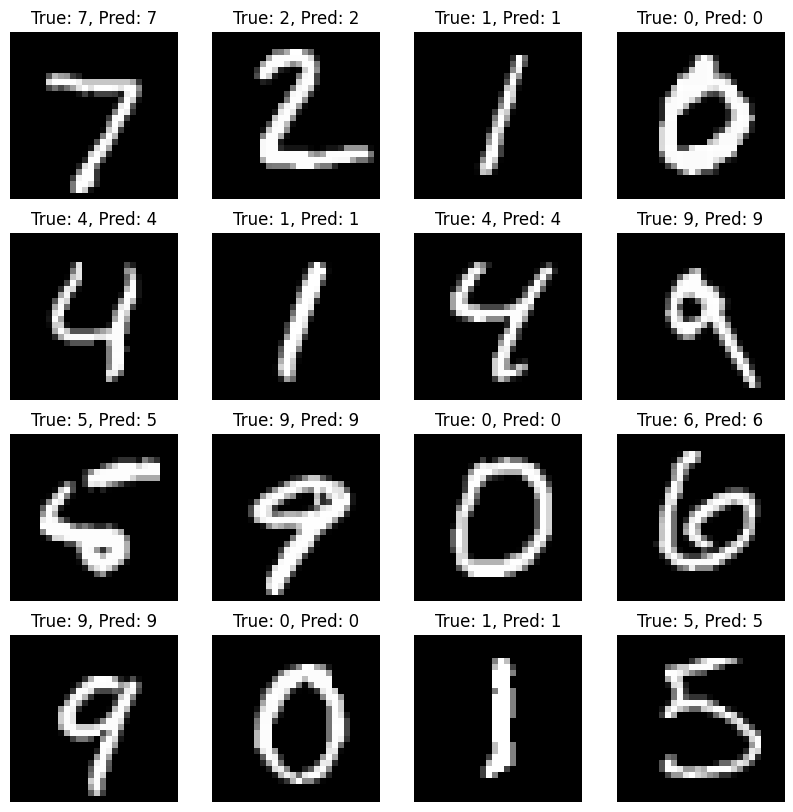

In [ ]:
# Visualize Some Predictions
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_true[i]}, Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()

EXPLANATION:
The "Handwritten Digit Prediction" project aims to build a machine learning model that can accurately classify handwritten digits (0-9) from grayscale images using the MNIST dataset. The dataset consists of 70,000 images, each 28x28 pixels, with 60,000 for training and 10,000 for testing. The images are normalized for consistent scaling and paired with labels representing the digits. A neural network model is trained using techniques like image flattening, hidden layers with activation functions, and softmax for output classification. The project includes preprocessing the data, training the model, and evaluating its performance using metrics like accuracy and confusion matrices. It automates digit recognition, which has applications in digitizing documents, postal code processing, and form analysis. The project demonstrates practical applications of machine learning in image classification. By visualizing predictions, it also helps identify errors for improvement. Ultimately, the project bridges theoretical knowledge and real-world problem-solving with neural networks.